In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X=numpy.asarray([1,2,4,3,5])
train_Y=numpy.asarray([1,3,3,2,5])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.561090589 W= 1.3151675 b= -1.4792478
Epoch: 0100 cost= 0.511057615 W= 1.2740463 b= -1.3265653
Epoch: 0150 cost= 0.468865305 W= 1.2357504 b= -1.1864891
Epoch: 0200 cost= 0.433258533 W= 1.2005782 b= -1.0578426
Epoch: 0250 cost= 0.403208315 W= 1.1682758 b= -0.93969434
Epoch: 0300 cost= 0.377845913 W= 1.1386093 b= -0.8311865
Epoch: 0350 cost= 0.356438905 W= 1.1113632 b= -0.73153245
Epoch: 0400 cost= 0.338369220 W= 1.0863402 b= -0.64000964
Epoch: 0450 cost= 0.323115706 W= 1.0633593 b= -0.555955
Epoch: 0500 cost= 0.310238570 W= 1.0422536 b= -0.47875908
Epoch: 0550 cost= 0.299366772 W= 1.0228702 b= -0.40786275
Epoch: 0600 cost= 0.290187091 W= 1.0050687 b= -0.3427516
Epoch: 0650 cost= 0.282435536 W= 0.9887194 b= -0.2829532
Epoch: 0700 cost= 0.275889248 W= 0.9737043 b= -0.22803424
Epoch: 0750 cost= 0.270360202 W= 0.9599144 b= -0.17759651
Epoch: 0800 cost= 0.265689850 W= 0.94724965 b= -0.13127446
Epoch: 0850 cost= 0.261744320 W= 0.9356185 b= -0.08873226
Epoch: 0900 cost= 0.25

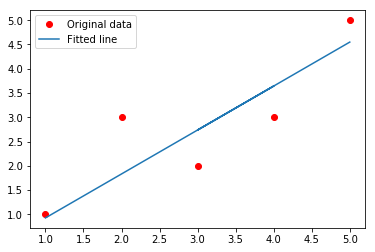

In [8]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [9]:
# Regression result